# Introduction
The data analysis i am going to do is about the titanic data set which was obtained from(https://www.kaggle.com/c/titanic/data). As we observe the data we can see their is information about demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

#Questions 
By obeserving any kind of data i should be able to write question what kind of data can be analysed from the given data set. which was observed in data analysis process lesson.

1) which class of people has the highest survival rate?
2) was a age one of the factor for survival rate not considering the gender and class?
3) which gender has the higher survival rate wheather it is male or female?
4) most of the survived people are of which group of age?
5) Did embarkation point affect the survival rate?



DATA Discription
1) survival = (yes=1) (no=0)
2) p-class = passenger class(1=1st; 2= 2nd 3= 3rd class)
3) name = Name 
4) age = Age 
5) sibsip = Number siblings/ Spouses aboard
6) parch = Number of parents/ children aboard
7) ticket - Ticket number
8) fare = passenger fare
9) cabin : Cabin
10) embarked : Port of embarkment (C = Cherbourg , Q = Queenstown, S = Southampton)

In [73]:
%matplotlib inline 

#importing libraries

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline



In [74]:
# In this cell i will be loading the ctitanic data wich is in the csv format and print the top 5 rows of the data
#inorder to ensure the data is loaded correctly
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
#doublchecking to make sure we have loaded the correct data for that i will be printing the last 10 values
titanic_data.tail(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# Exploration of data


From the Data Analysis Process i understood that when i see any kind of dataset i need to frame atleast four questions which can be answered by analysing the data set.

so from the given titanic data set we can analyse the following questions

1) which class of people has the highest survival rate?

2) was a age one of the factor for survival rate not considering the gender and class?

3) which gender has the higher survival rate wheather it is male or female?

4) most of the survived people are of which group of age?

5) Did embarkation point affect the survival rate?




# Cleaning of data

1) duplicate values should be removed

2) removing of unwanted data which is not used for the analysis

3) fixing the missing values

In [76]:
#removing duplicate values
titanic_data_duplicates = titanic_data.duplicated()
print 'count of the duplicates are {}'.format(titanic_data_duplicates.sum())

count of the duplicates are 0


In [77]:
#seperating the required and unwanted data
titanic_data_required = titanic_data.drop(['Name','Ticket','Fare','Cabin'], axis=1)
titanic_data_required.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [78]:
#counting the missing values
titanic_data_required.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

# Handling missing values :

From the above observation i can say that their are missing values in two categories : that is Age and Embarked

For age their are 177 values i am going to populate the missing age values  i will use mean age based on the gender and Pclass. 


In [79]:
#determining the number of males and females with missing age values
missing_age_bool = pd.isnull(titanic_data_required['Age'])
missing_age_female = titanic_data_required [missing_age_bool]['Sex'] == 'female'
missing_age_male = titanic_data_required[missing_age_bool]['Sex'] == 'male'

print 'Number for females and males with age missing are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum())

Number for females and males with age missing are 53 and 124 respectively


In [80]:
#In this cell i will be calculating the mean age based on Sex and Pclass, 

missing_ages = titanic_data_required[titanic_data_required['Age'].isnull()]

mean_ages = titanic_data_required.groupby(['Sex','Pclass'])['Age'].mean()

#Below function helps me to replace the missing age values with mean from the mean ages dataframe
def remove_na_ages(row):
    
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']

titanic_data_required['Age'] =titanic_data_required.apply(remove_na_ages, axis=1)

In [81]:
#as we observe the above data we see that their are two missing values for the embarked. So in order to fill these 
#missing values we will be changing these values with the most occurance values  i.e somuthampton as most people are from southamption 



titanic_data_required['Embarked'].fillna('S',inplace=True)

In [82]:
titanic_data_required.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       891 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


# Data Exploration

In [83]:
titanic_data_required.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [84]:
#below information is about the data after the data cleaning process is completed
titanic_data_required.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       891 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [85]:
#Below is the function in order to find the survival ratio between many values for exmple i will be using this 
#function to know the survival ratio of men and many more 
def survival_ratio(df):
    survived = df[df['Survived'] == 1]
    return [ len(survived), len(df),(float)(len(survived)) / len(df)]

# Question-1
Which class of people has the highest survival?


In [86]:
Pclass_1 = titanic_data_required[titanic_data_required['Pclass'] == 1]
Pclass_2 = titanic_data_required[titanic_data_required['Pclass'] == 2]
Pclass_3 = titanic_data_required[titanic_data_required['Pclass'] == 3]

In [87]:
#In this cell i will be counting number of persons based  on there class in the given titanic data set
Pclass_1 = titanic_data_required[titanic_data_required['Pclass'] == 1]
Pclass_2 = titanic_data_required[titanic_data_required['Pclass'] == 2]
Pclass_3 = titanic_data_required[titanic_data_required['Pclass'] == 3]

print 'number of passengers on class_1 = {} /n/ number of passengers on class_2 = {} /n/ number of passengers on class_3'.format
(len(Pclass_1),len(Pclass_2), len(Pclass_3)) 


<built-in method format of str object at 0x10faf6ae0>


(216, 184, 491)

In [88]:
#By using the above function defined i will be calculating the survival ratio for each class i.e class_1, class_2,
#class_3 and total survival ratio.
print len(titanic_data), survival_ratio(titanic_data_required)
print len(Pclass_1),survival_ratio(Pclass_1)
print len(Pclass_2),survival_ratio(Pclass_2)
print len(Pclass_3),survival_ratio(Pclass_3)

891 [342, 891, 0.3838383838383838]
216 [136, 216, 0.6296296296296297]
184 [87, 184, 0.47282608695652173]
491 [119, 491, 0.24236252545824846]


With the above analysis i can clearly say that class one of the major factor in the survival of the people on the titanic. As people on the class_3 has a survival rate of 0.24 which is very less when compared with the people on the class_1 which has about 0.62 

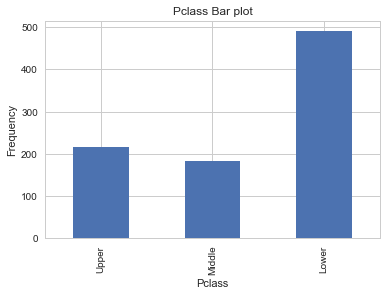

In [89]:
#with the below code i will be drawing a bar graph in order to compare which class has the highest survival
plt.figure()
titanic_data_required.groupby('Pclass')['PassengerId'].count().plot(kind= 'bar')
plt.xticks([0,1,2], ["Upper", "Middle","Lower" ])

plt.xlabel('Pclass')    #x-axis is the class
plt.ylabel('Frequency') #y-axis is frquency
plt.title('Pclass Bar plot')


As we observe the above bar-graph we can say that upper class people survived the most out of lower and middle class. So class is one of the factor for the survival rate.

# Question-2

Was a age one of the factor for the survival regarless of class and gender?



In [90]:
#we will be dropping the NaN values in the age 
titanic_data_age_cleaned = titanic_data_required.dropna()

In [91]:
#In this cell we will be determing the number of people survived and didn't
number_survived = titanic_data_age_cleaned[titanic_data_age_cleaned ['Survived'] == True]['Survived'].count()
number_not_survived = titanic_data_age_cleaned[titanic_data_age_cleaned ['Survived'] == False]['Survived'].count()

In [92]:
#In this cell we will be determining the mean of survived and the people didn't

mean_age_survived = titanic_data_age_cleaned[titanic_data_age_cleaned ['Survived'] == True]['Age'].mean()

mean_age_not_survived = titanic_data_age_cleaned[titanic_data_age_cleaned ['Survived'] == False]['Age'].mean()

Total number of survivors 342 
Total number of non survivors 549 
Mean age of survivors 28.0 
Mean age of non survivors 30.0 


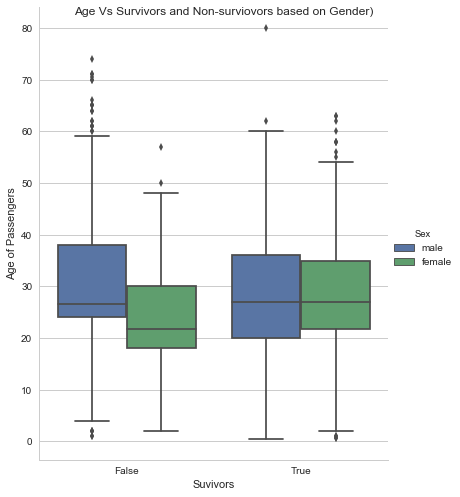

In [93]:
# Display a few raw totals
print 'Total number of survivors {} \n\
Total number of non survivors {} \n\
Mean age of survivors {} \n\
Mean age of non survivors {} ' \
.format(number_survived, number_not_survived, np.round(mean_age_survived), 
        np.round(mean_age_not_survived))

# Graph - Age of passengers across sex of those who survived
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_age_cleaned, kind="box", size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)
g.fig.suptitle('Age Vs Survivors and Non-surviovors based on Gender)')

By obeserving the above graph we can say that Age was not a factor for the survival not considering the Gender and Class. As people who survived and who didnot survived are in the same inline 

# Question-3

Which gender has the highest survival rate?


In [94]:
#In this cell i will be counting number of males and females on the titanic data set
male_number = titanic_data_required[titanic_data_required ['Sex'] == 'male']
female_number = titanic_data_required[titanic_data_required ['Sex'] == 'female']

print 'number of males on the titanic = {} /n/ number of males on the titanic = {}' .format(len(male_number),
                                                                                            len(female_number)) 


number of males on the titanic = 577 /n/ number of males on the titanic = 314


In [95]:
#By using the above function defined i will be calculating the survival ratio for male, female, total survival ratio.
print len(titanic_data), survival_ratio(titanic_data_required)
print len(male_number),survival_ratio(male_number)
print len(female_number),survival_ratio(female_number)



891 [342, 891, 0.3838383838383838]
577 [109, 577, 0.18890814558058924]
314 [233, 314, 0.7420382165605095]


Based on the above analysis we can say that gender was a factor for the survival as out of 314 females on titanic 74% was the survival strength but for the males out of 577 male strength only 18% of them survived.

# Question-4 

Most of the survived people are of which age group?


In [96]:
#In this cell we have categorized the all the people based on their age group into 6 intervels.

age_0_to_10 = titanic_data_required[(titanic_data_required['Age'] <=10) & (titanic_data_required['Age'] > 0)]
age_11_to_20 = titanic_data_required[(titanic_data_required['Age'] <= 20) & (titanic_data_required['Age'] > 10)]
age_21_to_30 = titanic_data_required[(titanic_data_required['Age'] <= 30) & (titanic_data_required['Age'] > 20)]
age_31_to_40 = titanic_data_required[(titanic_data_required['Age'] <= 40) & (titanic_data_required['Age'] > 30)]
age_41_to_50 = titanic_data_required[(titanic_data_required['Age'] <= 50) & (titanic_data_required['Age'] > 40)]
age_above_50 = titanic_data_required[titanic_data_required['Age'] > 50]

print len(age_0_to_10), len(age_11_to_20), len(age_21_to_30), len(age_31_to_40), len(age_41_to_50), len(age_above_50)

64 115 368 173 107 64


In [97]:
#In this cell we will be calculating the survival ratio for each age group which we have categorized in the above cell.
print survival_ratio(age_0_to_10)
print survival_ratio(age_11_to_20)
print survival_ratio(age_21_to_30)
print survival_ratio(age_31_to_40)
print survival_ratio(age_41_to_50)
print survival_ratio(age_above_50)


[38, 64, 0.59375]
[44, 115, 0.3826086956521739]
[120, 368, 0.32608695652173914]
[80, 173, 0.4624277456647399]
[38, 107, 0.35514018691588783]
[22, 64, 0.34375]


Based on the above analysis we can say that out of all age group which we have categorized age 0 to 10 has the highest survival

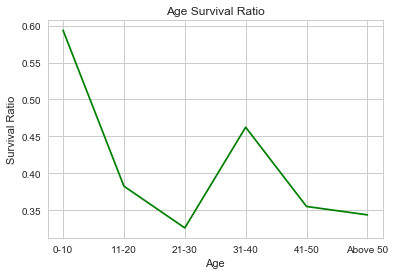

In [98]:
#By using the above analysis i will be representing the above data in a graphical representation in 6 intervals.
age_survival_ratio = [survival_ratio(age_0_to_10)[2], survival_ratio(age_11_to_20)[2], \
                      survival_ratio(age_21_to_30)[2],\
                           survival_ratio(age_31_to_40)[2], survival_ratio(age_41_to_50)[2], \
                      survival_ratio(age_above_50)[2]]

x = range(6)
X_values = ['0-10', '11-20', '21-30', '31-40', '41-50', 'Above 50']
plt.xticks(x,X_values)
plt.plot(x, age_survival_ratio, 'g')
plt.xlabel('Age')
plt.ylabel('Survival Ratio')
plt.title('Age Survival Ratio')

Fom the above graph we can draw the conclusions that :

-> age group of 0-10 has sthe highest survival 

-> 21-30 out of all has the least survival rate

-> 31-40 has the second highest survival rate 

-> After age 40 the survival rate is going in downward direction

# Question-5
Did embarakation point imapact the survival rate?



In [99]:
# In order to analyze the data based on the embarkation point i need to categorize and count the embarkation point
#based on their respective category
embarkation_s = titanic_data_required[titanic_data_required['Embarked'] == 'S']
embarkation_q = titanic_data_required[titanic_data_required['Embarked'] == 'Q']
embarkation_c = titanic_data_required[titanic_data_required['Embarked'] == 'C']


In [100]:
#In this cell we will be calculating the survival ratio based on the embarkation point by using the survival ratio 
#function
print survival_ratio(embarkation_s)
print survival_ratio(embarkation_q)
print survival_ratio(embarkation_c)


[219, 646, 0.33900928792569657]
[30, 77, 0.38961038961038963]
[93, 168, 0.5535714285714286]


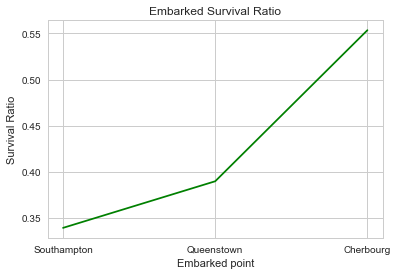

In [101]:
#Based on the above analysis i need to represent the data in graphical representation which makes a  clear understanding
#of the analysis
embarkation_point_survival_ratio = [survival_ratio(embarkation_s)[2], survival_ratio(embarkation_q)[2], \
                      survival_ratio(embarkation_c)[2]]

x = range(3)
X_values = ['Southampton', 'Queenstown', 'Cherbourg']
plt.xticks(x,X_values)
plt.plot(x, embarkation_point_survival_ratio, 'g')
plt.xlabel('Embarked point')
plt.ylabel('Survival Ratio')
plt.title('Embarked Survival Ratio')

From the above graph we can clearly analyze that 

-> People who embarked at Cherbourng has the survival highest rate

->  when compared with People who embarked at queenstown and southampton, people who embarked at queenstown has the higher rate.


# Conclusion:

From the above analysis results i caa say that gender,classs, and embarked point played a major role in the survival of people.I can say that age would be a secondary factor out of all.
From the titanic data set i can say that if a peorson is male of age 21-30 and embarked at Southhamton would have the least survival rate. Where as Female person of age 1-10 and embarked at cherbourg point would have the highest survival rate.


Missing observations: I could use the fare coloum for my analsis to know whether their were any categories based on that

Missing features : The given dataset consists of information related to passengers only. They should have provided the information related to the staff also. In order to maintain such a huge ship they must be atleast 100 people.

Missing values : As from the above analysis i can say that their were 177 values missing in the age colomn and 2 values missing in the embarkation point




# References:

https://www.kaggle.com/c/titanic

http://pandas.pydata.org/pandas-docs/stable/#
